In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv("D:\Labs\diabetes.csv",sep=",")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

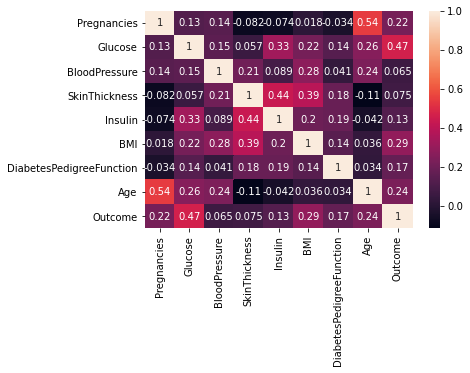

In [3]:
correlation = df.corr()
sns.heatmap(correlation,annot=True)

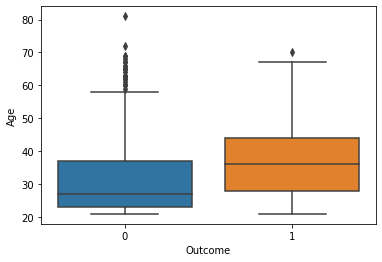

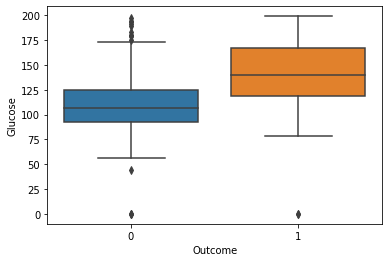

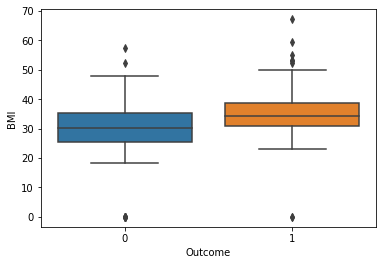

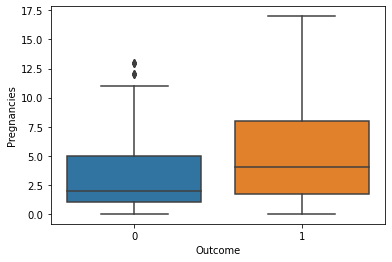

In [4]:
continuousColumns = ["Age","Glucose","BMI","Pregnancies"]
for item  in continuousColumns:
    sns.boxplot(x="Outcome", y=item, data=df)
    plt.show()

<AxesSubplot:title={'center':'BMI'}, xlabel='BMI', ylabel='Count'>

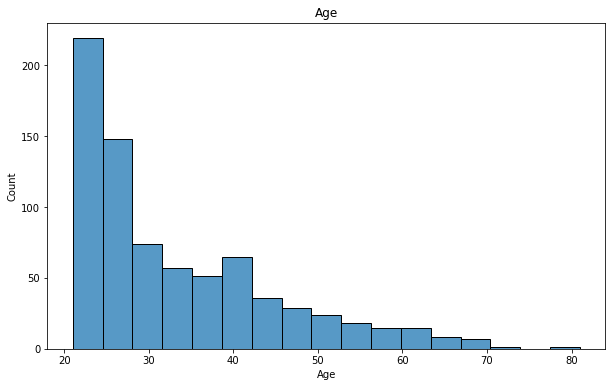

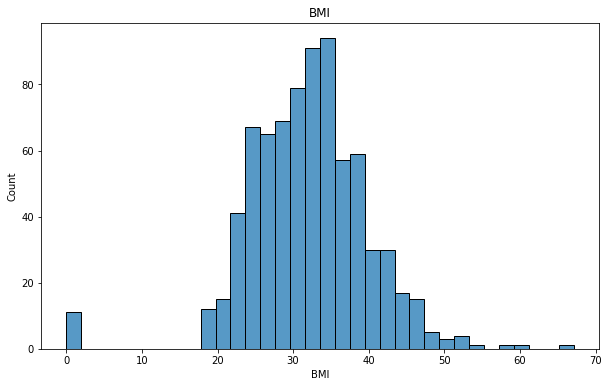

In [5]:
plt.figure(2, figsize=(10,6))
plt.title("Age")
sns.histplot(df['Age'])

plt.figure(3, figsize=(10,6)) 
plt.title("BMI")
sns.histplot(df['BMI'])

In [6]:
minMaxScaler = MinMaxScaler()
scaledColums = pd.DataFrame(minMaxScaler.fit_transform(df))
scaledColums.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
target = ["Outcome"]
features = df.columns.drop(target)
train,test = train_test_split(df,test_size = 0.33)
xTrain = train[features]
yTrain = train[target]
xTest  = test[features]
yTest = test[target]

In [8]:
knnModel = KNeighborsClassifier(n_neighbors=5) 
knnModel.fit(xTrain,yTrain.values.ravel())

KNeighborsClassifier()

In [9]:
yPred= knnModel.predict(xTest)
accuracy_score(yTest,yPred)

0.7322834645669292

In [10]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       165
           1       0.63      0.56      0.60        89

    accuracy                           0.73       254
   macro avg       0.71      0.69      0.70       254
weighted avg       0.73      0.73      0.73       254



<AxesSubplot:>

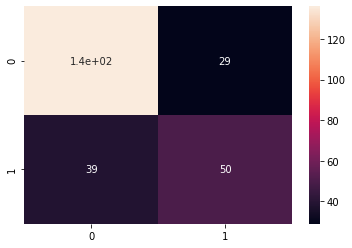

In [11]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [12]:
dTree = DecisionTreeClassifier(max_depth=4)
dTree.fit(xTrain, yTrain)

DecisionTreeClassifier(max_depth=4)

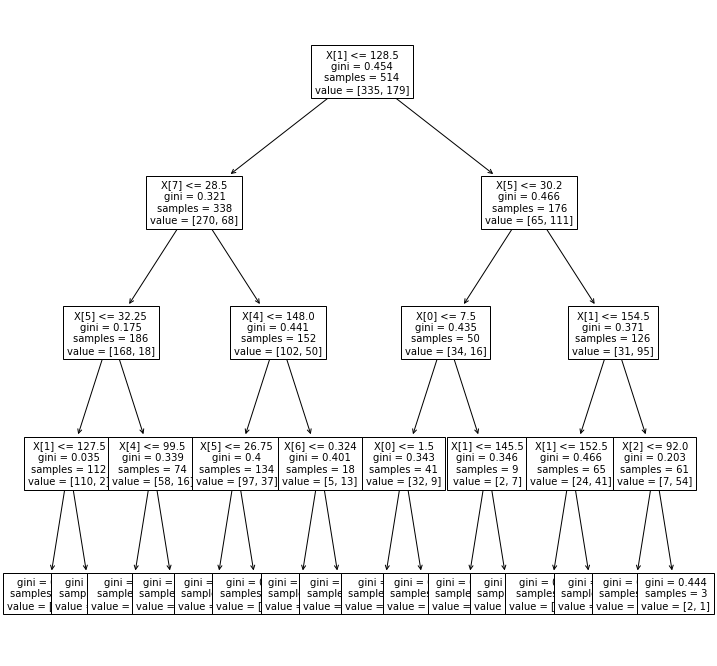

In [13]:
plt.figure(figsize=(12,12))
plot_tree(dTree, fontsize=10)
plt.show()

In [14]:
yPred = dTree.predict(xTest)
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       165
           1       0.60      0.51      0.55        89

    accuracy                           0.71       254
   macro avg       0.68      0.66      0.67       254
weighted avg       0.70      0.71      0.70       254



In [15]:
yPred= dTree.predict(xTest)
accuracy_score(yTest,yPred)

0.7086614173228346

<AxesSubplot:>

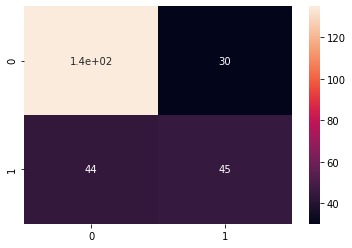

In [16]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [17]:
SVC_clsfr = SVC(C=1, gamma=1)
SVC_clsfr.fit(xTrain,yTrain.values.ravel())

SVC(C=1, gamma=1)

In [18]:
yPred= SVC_clsfr.predict(xTest)
accuracy_score(yTest,yPred)

0.6496062992125984

In [19]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       165
           1       0.00      0.00      0.00        89

    accuracy                           0.65       254
   macro avg       0.32      0.50      0.39       254
weighted avg       0.42      0.65      0.51       254



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

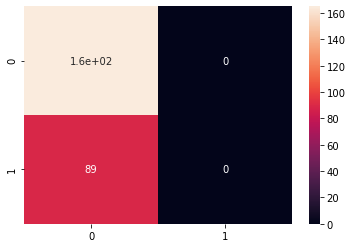

In [20]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [21]:
rForest = RandomForestClassifier(n_estimators = 200)
rForest.fit(xTrain,yTrain.values.ravel())

RandomForestClassifier(n_estimators=200)

In [22]:
yPred= rForest.predict(xTest)
accuracy_score(yTest,yPred)

0.7283464566929134

In [23]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       165
           1       0.62      0.57      0.60        89

    accuracy                           0.73       254
   macro avg       0.70      0.69      0.70       254
weighted avg       0.72      0.73      0.73       254



<AxesSubplot:>

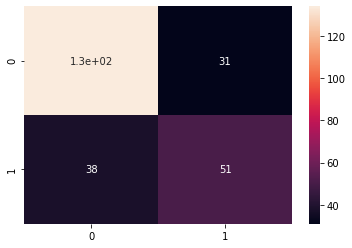

In [24]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [25]:
AdaB = AdaBoostClassifier(n_estimators=200, learning_rate=0.1)
AdaB.fit(xTrain,yTrain.values.ravel())

AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [26]:
yPred= AdaB.predict(xTest)
accuracy_score(yTest,yPred)

0.7480314960629921

In [27]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       165
           1       0.66      0.57      0.61        89

    accuracy                           0.75       254
   macro avg       0.72      0.71      0.71       254
weighted avg       0.74      0.75      0.74       254



<AxesSubplot:>

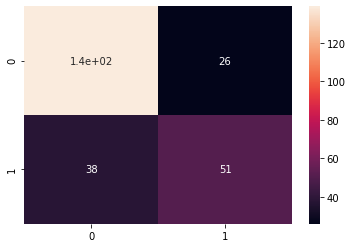

In [28]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [29]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
SVC_clsfr = SVC()
grid_search = GridSearchCV(SVC_clsfr, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [30]:
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is -0.10602700781805308
The best parameters are:
 SVC(C=1, gamma=0.0001)


In [31]:
param_grid={'n_estimators':[500,1000,2000],'learning_rate':[0.001,0.01,0.1]}
AdaB = AdaBoostClassifier()
grid_search=GridSearchCV(AdaB, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True,n_jobs=1)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [32]:
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is -0.011603885335229025
The best parameters are:
 AdaBoostClassifier(learning_rate=0.01, n_estimators=2000)


In [33]:
param_grid ={'max_depth': [4, 6, 8, 10, 12], 'max_features': [1, 2, 3, 4]}
dTree = DecisionTreeClassifier()
grid_search=GridSearchCV(dTree, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [34]:
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is -0.1748282397536134
The best parameters are:
 DecisionTreeClassifier(max_depth=6, max_features=3)


In [35]:
param_grid ={'max_depth': [4, 6, 8, 10, 12], 'n_estimators': [50, 100, 150, 200]}
rForest = RandomForestClassifier()
grid_search=GridSearchCV(rForest, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [36]:
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.01401800521203469
The best parameters are:
 RandomForestClassifier(max_depth=4)


In [40]:
param_grid ={'n_neighbors': [2,3,4,8,11,20,25]}
knnModel = KNeighborsClassifier() 
grid_search=GridSearchCV(knnModel, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [41]:
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is -0.2001326699834168
The best parameters are:
 KNeighborsClassifier(n_neighbors=8)
